In [42]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('colombian_elections.csv')

In [44]:
df.head(3)

,Unnamed: 0,tweet_id,tweetText,polarity_value,polarity_type,topic,set
0,2,ID:142391947707940864,@marodriguezb Gracias MAR,P,AGREEMENT,otros,train
1,3,ID:142416095012339712,"Off pensando en el regalito Sinde, la que se va de la SGAE cuando se van sus corruptos. Intento no sacar conclusiones (lo intento)",N,AGREEMENT,política,train
2,4,ID:142422495721562112,Conozco a alguien q es adicto al drama! Ja ja ja te suena d algo!,P,AGREEMENT,otros,train


In [45]:
df = df[['tweetText','polarity_value']].rename(columns={'tweetText':'texto', 'polarity_value':'sentimiento'})

In [46]:
df.head(3)

,texto,sentimiento
0,@marodriguezb Gracias MAR,P
1,"Off pensando en el regalito Sinde, la que se va de la SGAE cuando se van sus corruptos. Intento no sacar conclusiones (lo intento)",N
2,Conozco a alguien q es adicto al drama! Ja ja ja te suena d algo!,P


In [47]:
# df['sentimento'].value_counts()

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df['texto'], df['sentimiento'], random_state=20)

In [50]:
X_train[:5]

3782                                               B. Días. Messi pasa a la historia, una vez más. Cinco goles en un partido de Champions.
2255    “@pedro_jose7 El Semanal Digital es de lo mejor que hay en la red para mantenerse bien informado. Felicidades.” Muchas gracias!!!!
312                                                                           Madrid. Gracias por vuestro cariño. Ha sido un placer!!!!!!.
1169                                                Creo @Juandecolmenero  que lo de @deguindosluis  es un fake. Así que nos hemos colado.
3965                                                                                                               Buenos días ;-)) #lunes
Name: texto, dtype: object

In [51]:
y_train[:5]


3782    P
2255    P
312     P
1169    N
3965    P
Name: sentimiento, dtype: object

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
regression = LogisticRegression()

In [54]:
# regression.fit(X_train, y_train)
# acc = regression.score(X_test, y_test)
# print(acc)

In [55]:
df['sentiment'] = df['sentimiento'].replace(['N','P'],[0, 1])

In [56]:
df.head(3)

,texto,sentimiento,sentiment
0,@marodriguezb Gracias MAR,P,1
1,"Off pensando en el regalito Sinde, la que se va de la SGAE cuando se van sus corruptos. Intento no sacar conclusiones (lo intento)",N,0
2,Conozco a alguien q es adicto al drama! Ja ja ja te suena d algo!,P,1


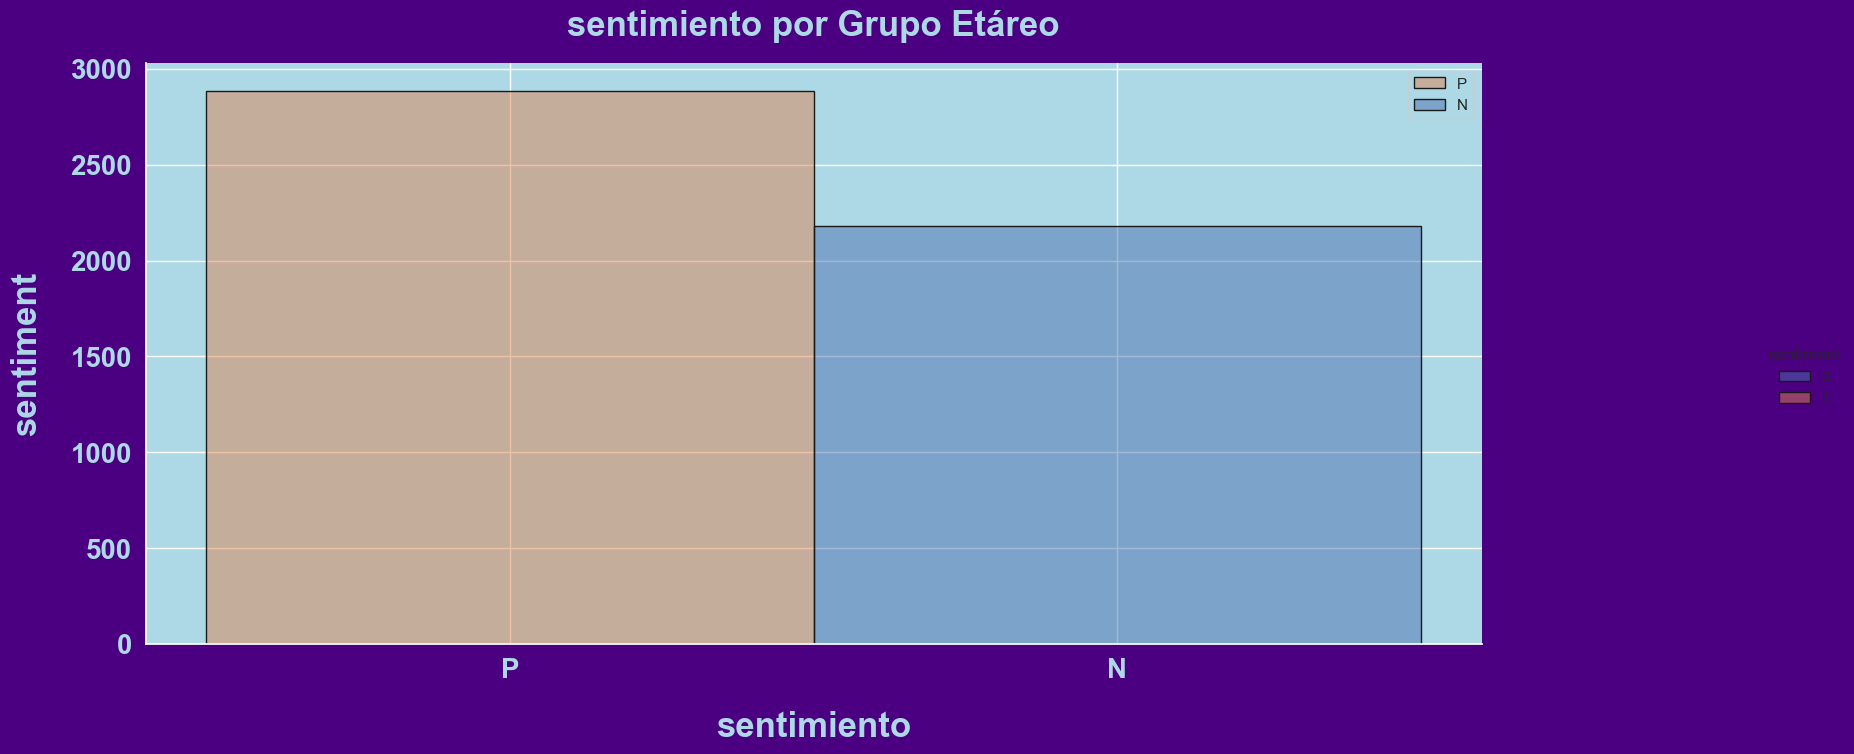

In [57]:
def grafico():
    sns.set(rc={"axes.facecolor": "lightblue", "figure.facecolor": "indigo"})
    ax = sns.displot(data=df, x='sentimiento',hue='sentiment',kde=True,color='b',  edgecolor='k');
    ax.figure.set_size_inches(20,7)
    ax.set_titles('sentimiento sesgo positivo /  negativo', fontsize=25, color='lightblue', fontweight='bold', pad=20)
    plt.title('sentimiento por Grupo Etáreo', fontsize=25, color='lightblue', fontweight='bold', pad=20)
    ax.set_xlabels('sentimiento', fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    ax.set_ylabels('sentiment',fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    plt.xticks(color='lightblue', size=20, fontweight='bold')
    plt.yticks(color='lightblue', size=20, fontweight='bold')
    plt.legend(df['sentimiento'])
    plt.show()
grafico()

Lo que aprendimos en esta aula:

Un modelo de machine learning para clasificar datos textuales.
Cómo realizar pré-análisis de datos textuales.
Un clasificador estándar para Análisis de Sentimiento.

In [58]:
from nltk import tokenize

In [59]:
frase = 'hola chicos y chicas!'
token_puntuacion = tokenize.WordPunctTokenizer()

token_frase = token_puntuacion.tokenize(frase)
print(token_frase)

['hola', 'chicos', 'y', 'chicas', '!']


In [62]:
from sklearn.feature_extraction.text import CountVectorizer

In [74]:
texto = ['Las propuestas son buenas','Las propuestas no son buenas']

vectorizer = CountVectorizer(lowercase=False)

bag_of_words = vectorizer.fit_transform(texto)
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [75]:
vectorizer.get_feature_names_out()

array(['Las', 'buenas', 'no', 'propuestas', 'son'], dtype=object)

In [77]:
matriz = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vectorizer.get_feature_names_out())

In [78]:
matriz

,Las,buenas,no,propuestas,son
0,1,1,0,1,1
1,1,1,1,1,1


In [91]:
vectorizer2 = CountVectorizer(lowercase=True, max_features=100)

bag_of_words2 = vectorizer2.fit_transform(df.texto)

In [92]:
print(bag_of_words2.shape)

(5066, 100)


In [93]:
X_train, X_test, y_train, y_test = train_test_split(bag_of_words2, df['sentiment'], random_state=20)
regression.fit(X_train, y_train)
acc = regression.score(X_test, y_test)
print(acc)

0.7000789265982637


In [96]:
def clasificador(df, columna_texto, columna_categoria):
    vectorizer = CountVectorizer(lowercase=True, max_features=100)
    bag_of_words = vectorizer.fit_transform(df[columna_texto])
    X_train, X_test, y_train, y_test = train_test_split(bag_of_words, df[columna_categoria], random_state=20)
    regression.fit(X_train, y_train)
    return regression.score(X_test, y_test)    

In [97]:
clasificador(df, 'texto','sentiment')

0.7000789265982637